##  Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv('Stress.csv')

## Reading the data

In [3]:
data.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step count    2001 non-null   int64  
 3   Stress Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [5]:
data.isnull().sum()

Humidity        0
Temperature     0
Step count      0
Stress Level    0
dtype: int64

In [6]:
data.describe()

,Humidity,Temperature,Step count,Stress Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


## Splitting the dataset ratio is 80-20

In [7]:

X = data.drop('Stress Level', axis=1)
y = data['Stress Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the model

In [8]:

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Visualization

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

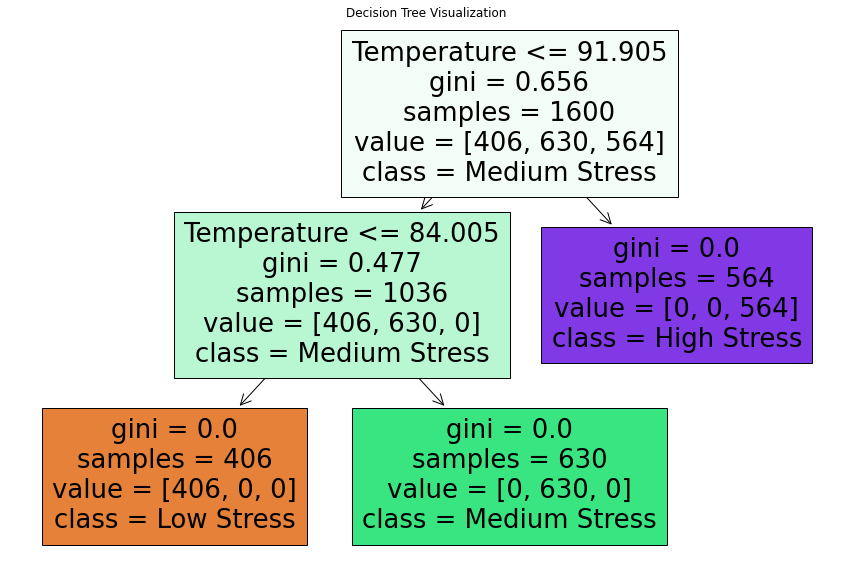

In [10]:
plt.figure(figsize=(15, 10))
plot_tree(classifier, filled=True, feature_names=X.columns, class_names=['Low Stress', 'Medium Stress', 'High Stress'])
plt.title("Decision Tree Visualization")
plt.show()

## Accuracy prediction

In [11]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


## Predicting

In [12]:
#prediction
new_data = pd.DataFrame({
    'Humidity': [25.0],
    'Temperature': [92.0],
    'Step_count': [150]
})

predicted_stress = classifier.predict(new_data)
print(f"Predicted Stress Level: {predicted_stress[0]}")

Predicted Stress Level: 2


C:\anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Step_count
Feature names seen at fit time, yet now missing:
- Step count

  warnings.warn(message, FutureWarning)


In [13]:
#prediction
new_data = pd.DataFrame({
    'Humidity': [21.41],
    'Temperature': [90.41],
    'Step_count': [93]
})

predicted_stress = classifier.predict(new_data)
print(f"Predicted Stress Level: {predicted_stress[0]}")

Predicted Stress Level: 1


C:\anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Step_count
Feature names seen at fit time, yet now missing:
- Step count

  warnings.warn(message, FutureWarning)
